In [34]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import adjustText
from adjustText import adjust_text

#Upload from CSVs
prof_adv_path = "prof_adv_2023_all.csv"
dist_attend_path = "District Proportional Attendance Rates.csv"
fr_rates_path = "FRLUNCH.csv"
fr_all_path = "FRALL.csv"
dist_count_path = "district_counties.csv"

#Read data and results
prof_adv_df = pd.read_csv(prof_adv_path)
fr_all_df = pd.read_csv(fr_all_path)
dist_count_df = pd.read_csv(dist_count_path)
att_all_df = pd.read_csv(dist_attend_path)

att_all_df.head()



,YEAR,COUNTY_DISTRICT_CODE,DISTRICT_NAME,PROPORTIONAL_ATTENDANCE_TOTAL_90ABV,PROPORTIONAL_ATTENDANCE_TOTAL,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,PROPORTIONAL_ATTENDANCE_ASIAN_90ABV,PROPORTIONAL_ATTENDANCE_ASIAN,PROPORTIONAL_ATTENDANCE_ASIAN_PCT,PROPORTIONAL_ATTENDANCE_BLACK_90ABV,...,PROPORTIONAL_ATTENDANCE_WHITE_PCT,PROPORTIONAL_ATTENDANCE_K_8_90ABV,PROPORTIONAL_ATTENDANCE_K_8,PROPORTIONAL_ATTENDANCE_K_8_PCT,PROPORTIONAL_ATTENDANCE_9_12_90ABV,PROPORTIONAL_ATTENDANCE_9_12,PROPORTIONAL_ATTENDANCE_9_12_PCT,PROPORTIONAL_ATTENDANCE_LEP_PCT,PROPORTIONAL_ATTENDANCE_IEP_PCT,PROPORTIONAL_ATTENDANCE_FRL_PCT
0,2009,1090,ADAIR CO. R-I,248.4377,266.6593,93.2,*,*,*,*,...,93.2,165.0645,177.3542,93.1,83.3732,89.3051,93.4,*,91.2,92
1,2010,1090,ADAIR CO. R-I,250.3324,263.2789,95.1,*,*,*,*,...,95.1,175.516,181.5935,96.7,74.8164,81.6854,91.6,*,79.6,93.4
2,2011,1090,ADAIR CO. R-I,235.0871,249.8533,94.1,*,*,*,*,...,94,159.0049,167.3768,95,76.0822,82.4765,92.2,*,91.1,90.9
3,2012,1090,ADAIR CO. R-I,228.5513,248.4943,92,*,*,*,*,...,92.3,150.3997,162.4863,92.6,78.1516,86.008,90.9,*,96.2,88.4
4,2013,1090,ADAIR CO. R-I,242.0416,261.1034,92.7,*,*,*,*,...,93.4,165.1032,175.8103,93.9,76.9384,85.2931,90.2,*,88.6,90.2


## Filter Prof/Advanced

In [35]:
#Filter to only total scores
prof_adv_total_df = prof_adv_df.loc[(prof_adv_df["TYPE"]=="Total")]

#Filter to only math
prof_adv_math_df = prof_adv_total_df.loc[(prof_adv_total_df["CONTENT_AREA"]=="Mathematics")]

#Reduce
prof_adv_math_reduced_df = prof_adv_math_df[["DISTRICT_NAME", "PROFICIENT_PCT", "ADVANCED_PCT"]]

#Export to csv
prof_adv_math_reduced_df.to_csv('prof_adv_math.csv', index=False)

#Import edited csv - Narrowed down
prof_adv_math_updated_path = "prof_adv_math_filtered.csv"
prof_adv_math_new_df = pd.read_csv(prof_adv_math_updated_path)



In [49]:
prof_adv_math_reduced_df = prof_adv_math_reduced_df.rename(columns={"DISTRICT_NAME": "District Name"})
prof_adv_math_reduced_df.head()

,District Name,PROFICIENT_PCT,ADVANCED_PCT
17,ADAIR CO. R-I,16.1,12.5
61,KIRKSVILLE R-III,22.6,21.6
76,ADAIR CO. R-II,31.3,*
99,NORTH ANDREW CO. R-VI,32.5,29.9
119,AVENUE CITY R-IX,36.9,29.2


In [37]:
#Rename column
att_all_df = att_all_df.rename(columns={"DISTRICT_NAME": "District Name"})

#Filter by school and scores

att_district_list = ["FRANKLIN CO. R-II", "MERAMEC VALLEY R-III", "NEW HAVEN", "ST. CLAIR R-XIII", "SULLIVAN",
    "UNION R-XI", "WASHINGTON", "CRYSTAL CITY 47", "DESOTO 73", "DUNKLIN R-V", "FESTUS R-VI", "FOX C-6",
    "GRANDVIEW R-II", "HILLSBORO R-III", "JEFFERSON CO. R-VII", "NORTHWEST R-I", "SUNRISE R-IX", "WINDSOR C-1",
    "FERGUSON-FLORISSANT R-II", "HANCOCK PLACE", "HAZELWOOD", "JENNINGS", "NORMANDY SCHOOLS COLLABORATIVE",
    "PATTONVILLE R-III", "RITENOUR", "RIVERVIEW GARDENS", "AFFTON 101", "BAYLESS", "MEHLVILLE R-IX", 
    "FRANCIS HOWELL R-III", "FT. ZUMWALT R-II", "ORCHARD FARM R-V", "ST. CHARLES R-VI", "WENTZVILLE R-IV",
    "ST. LOUIS CITY", "BRENTWOOD", "CLAYTON", "KIRKWOOD R-VII", "LADUE", "LINDBERGH SCHOOLS", 
    "MAPLEWOOD-RICHMOND HEIGHTS", "PARKWAY C-2", "ROCKWOOD R-VI", "UNIVERSITY CITY", "VALLEY PARK", "WEBSTER GROVES"]

att_reduced_1_df = att_all_df.loc[att_all_df["District Name"].isin(att_district_list)]



att_reduced_1_df.head()



            


,YEAR,COUNTY_DISTRICT_CODE,District Name,PROPORTIONAL_ATTENDANCE_TOTAL_90ABV,PROPORTIONAL_ATTENDANCE_TOTAL,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,PROPORTIONAL_ATTENDANCE_ASIAN_90ABV,PROPORTIONAL_ATTENDANCE_ASIAN,PROPORTIONAL_ATTENDANCE_ASIAN_PCT,PROPORTIONAL_ATTENDANCE_BLACK_90ABV,...,PROPORTIONAL_ATTENDANCE_WHITE_PCT,PROPORTIONAL_ATTENDANCE_K_8_90ABV,PROPORTIONAL_ATTENDANCE_K_8,PROPORTIONAL_ATTENDANCE_K_8_PCT,PROPORTIONAL_ATTENDANCE_9_12_90ABV,PROPORTIONAL_ATTENDANCE_9_12,PROPORTIONAL_ATTENDANCE_9_12_PCT,PROPORTIONAL_ATTENDANCE_LEP_PCT,PROPORTIONAL_ATTENDANCE_IEP_PCT,PROPORTIONAL_ATTENDANCE_FRL_PCT
2306,2009,36123,FRANKLIN CO. R-II,150.3437,154.3409,97.4,*,*,*,*,...,97.4,150.3437,154.3409,97.4,*,*,*,*,92.7,94.8
2307,2010,36123,FRANKLIN CO. R-II,155.6702,162.6239,95.7,*,*,*,*,...,95.7,155.6702,162.6239,95.7,*,*,*,*,89.4,92.7
2308,2011,36123,FRANKLIN CO. R-II,144.9314,154.4012,93.9,*,*,*,*,...,93.8,144.9314,154.4012,93.9,*,*,*,*,85.2,90.1
2309,2012,36123,FRANKLIN CO. R-II,134.5333,141.9881,94.7,*,*,*,*,...,94.7,134.5333,141.9881,94.7,*,*,*,*,88.5,91.9
2310,2013,36123,FRANKLIN CO. R-II,133.4635,138.6812,96.2,*,*,*,*,...,96.1,133.4635,138.6812,96.2,*,*,*,*,95.1,93.4


In [38]:
#Merge Attendance



#Filter
att_reduced_1_df = att_reduced_1_df.loc[att_reduced_1_df["YEAR"]==2023]

#Make Smaller
att_all_2_df = att_reduced_1_df[["District Name","PROPORTIONAL_ATTENDANCE_TOTAL_PCT" ]]

#Merge
att_merge_df = pd.merge(att_all_2_df, prof_adv_math_reduced_df, how="inner", on=["District Name"])

att_merge_df.head()

,District Name,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,PROFICIENT_PCT,ADVANCED_PCT
0,FRANKLIN CO. R-II,88.9,33.8,37.7
1,MERAMEC VALLEY R-III,75.7,26.6,17.1
2,UNION R-XI,79.4,26.8,22.7
3,ST. CLAIR R-XIII,78,21,11.6
4,SULLIVAN,79.1,24.2,19


In [39]:
#Add csv with districts and merge
dist_count_df = dist_count_df.rename(columns={"DISTRICT_NAME": "District Name"})

att_merge_df = pd.merge(att_merge_df, dist_count_df, how="inner", on=["District Name"])

#Change data types
#att_merge_df = att_merge_df.rename(columns={0:"FR_PCT"})
att_merge_df = att_merge_df.astype({"PROFICIENT_PCT": "float64"})
att_merge_df = att_merge_df.astype({"ADVANCED_PCT":"float64"})
att_merge_df = att_merge_df.astype({"PROPORTIONAL_ATTENDANCE_TOTAL_PCT": "float64"})
#att_merge_1_df = att_merge_1_df.astype({"TOTAL_PCT":"float64"})
#att_merge_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]=att_merge_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"].round(0)

#Add Totals Prof/Adv
total_pct = []
for index, row in att_merge_df.iterrows():
     total_pct.append((row["PROFICIENT_PCT"]+row["ADVANCED_PCT"]))
    
att_merge_df["TOTAL_PCT"] = total_pct



att_merge_df

,District Name,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,PROFICIENT_PCT,ADVANCED_PCT,COUNTY,TOTAL_PCT
0,FRANKLIN CO. R-II,88.9,33.8,37.7,Franklin County,71.5
1,MERAMEC VALLEY R-III,75.7,26.6,17.1,Franklin County,43.7
2,UNION R-XI,79.4,26.8,22.7,Franklin County,49.5
3,ST. CLAIR R-XIII,78.0,21.0,11.6,Franklin County,32.6
4,SULLIVAN,79.1,24.2,19.0,Franklin County,43.2
5,NEW HAVEN,93.7,29.8,20.0,Franklin County,49.8
6,WASHINGTON,81.6,28.0,19.5,Franklin County,47.5
7,NORTHWEST R-I,75.4,23.8,17.6,Jefferson County,41.4
8,GRANDVIEW R-II,95.0,12.6,5.6,Jefferson County,18.2
9,HILLSBORO R-III,78.9,25.8,16.6,Jefferson County,42.4


In [40]:
#reduce
att_merge_df = att_merge_df[["PROPORTIONAL_ATTENDANCE_TOTAL_PCT", "TOTAL_PCT", "COUNTY"]]
att_merge_df.head()

,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,TOTAL_PCT,COUNTY
0,88.9,71.5,Franklin County
1,75.7,43.7,Franklin County
2,79.4,49.5,Franklin County
3,78.0,32.6,Franklin County
4,79.1,43.2,Franklin County


In [44]:
#Round
att_merge_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"] = att_merge_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"].round(0)
att_merge_df["TOTAL_PCT"]=att_merge_df["TOTAL_PCT"].round(0)

att_merge_df.head()

/var/folders/x5/vxxw6g_96f337pf8r_zr_15h0000gn/T/ipykernel_67055/2114456113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_merge_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"] = att_merge_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"].round(0)
/var/folders/x5/vxxw6g_96f337pf8r_zr_15h0000gn/T/ipykernel_67055/2114456113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_merge_df["TOTAL_PCT"]=att_merge_df["TOTAL_PCT"].round(0)


,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,TOTAL_PCT,COUNTY
0,89.0,72.0,Franklin County
1,76.0,44.0,Franklin County
2,79.0,50.0,Franklin County
3,78.0,33.0,Franklin County
4,79.0,43.0,Franklin County


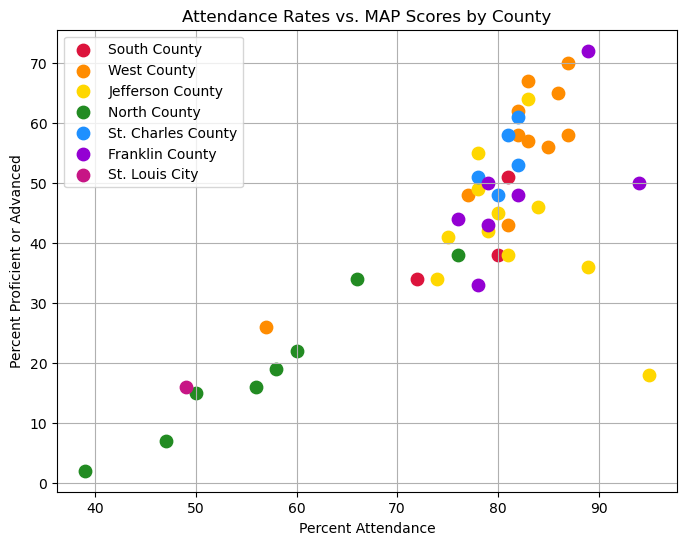

In [47]:
#colors for counties
county_colors = {'South County': "crimson", 'West County': "darkorange", 'Jefferson County': "gold", 'North County': "forestgreen",
       'St. Charles County': "dodgerblue", 'Franklin County': "darkviolet", 'St. Louis City': "mediumvioletred"}

plt.figure(figsize=(8, 6))

for county, color in county_colors.items():
    subset=att_merge_df[att_merge_df["COUNTY"]==county]
    plt.scatter(subset["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"], subset["TOTAL_PCT"], c=color, label = county, s=80)
plt.xlabel("Percent Attendance")
plt.ylabel("Percent Proficient or Advanced")
plt.title("Attendance Rates vs. MAP Scores by County")


# Add generation labels to the side
#for county, color in county_colors.items():
   # plt.text(0.95, merged_df[merged_df['COUNTY'] == county]['TOTAL_PCT'].mean(), county, color=color, fontsize=10, ha='right', va='center')
    
plt.legend()
plt.grid()

# Save the plot as an image file
plt.savefig('CountiesVsATT.png')

plt.show()